In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline

# Import data

In [6]:
path = 'C:/Users/84393/OneDrive - CÔNG TY TNHH OFFICIENCE/PYTHON/2_Linear_Regression/'
df = pd.read_csv(path + 'canada_per_capita_income.csv')
df

,year,per capita income (US$)
0,1970,3399.299037
1,1971,3768.297935
2,1972,4251.175484
3,1973,4804.463248
4,1974,5576.514583
5,1975,5998.144346
6,1976,7062.131392
7,1977,7100.126170
8,1978,7247.967035
9,1979,7602.912681


In [22]:
mean_income = np.round(np.mean(df['per capita income (US$)']),2)

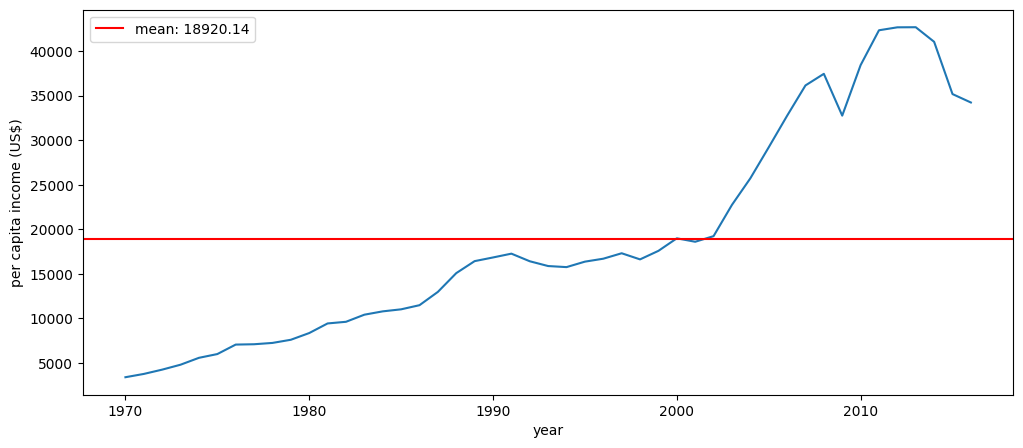

In [23]:
plt.figure(figsize=(12,5))
sns.lineplot(data=df,x=df.year, y=df['per capita income (US$)'], markers='o')
plt.axhline(mean_income, label=f"mean: {mean_income}" , color='r')
plt.legend()
plt.show()

# Model

In [24]:
from sklearn.linear_model import LinearRegression

In [41]:
X = df.year.values.reshape(-1,1)
y = df['per capita income (US$)'].values.reshape(-1,1)

# Fit

In [42]:
model = LinearRegression()
model.fit(X,y)

LinearRegression()

In [43]:
print(f'coef: {model.coef_} intercept: {model.intercept_}')

coef: [[828.46507522]] intercept: [-1632210.75785546]


# Plot the predict X

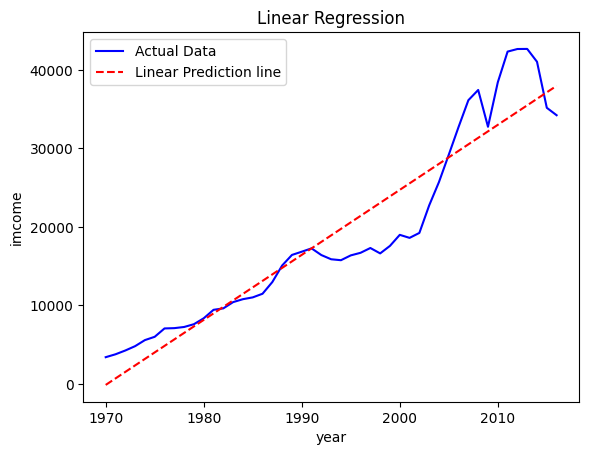

In [51]:
# Plot the actual data
plt.plot(X, y, color='blue', label='Actual Data')

# Plot the linear prediction line
plt.plot(X, model.predict(X), color='red', label='Linear Prediction line', linestyle='--')

# Add labels and legend
plt.xlabel('year')
plt.ylabel('imcome')
plt.title('Linear Regression')
plt.legend()

# Predict new data

In [44]:
predict_data = {'year': [2017,2018,2019,2020]}
df_pred = pd.DataFrame(predict_data)
df_pred

,year
0,2017
1,2018
2,2019
3,2020


In [47]:
y_pred = model.predict(df_pred.year.values.reshape(-1,1))

In [48]:
df_pred['per capita income (US$)'] = y_pred
df_pred

,year,per capita income (US$)
0,2017,38803.298869
1,2018,39631.763944
2,2019,40460.229019
3,2020,41288.694094


# Add Pipeline
I have to reshape my 1 column X and y before fitting the linear regression. But I don't want to every time reshape my X_predict. So i'd like to use pipeline to optimize it.

In [56]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import FunctionTransformer

X = df.year
y = df['per capita income (US$)']

# Define a function to reshape the input features
def reshape_features(X):
    return X.values.reshape(-1, 1)

# Create a pipeline
pipeline = Pipeline([
    ('reshape', FunctionTransformer(reshape_features)),
    ('linear_regression', LinearRegression())
])

# Fit the pipeline
pipeline.fit(X, y)

# Now you can use the pipeline to predict without reshaping X_predict
# X_predict = np.array([2023, 2024, 2025])  # Example X_predict
# predictions = pipeline.predict(X_predict[:, np.newaxis])

Pipeline(steps=[('reshape',
                 FunctionTransformer(func=<function reshape_features at 0x00000166BE78A8E0>)),
                ('linear_regression', LinearRegression())])

In [57]:
y_pred = pipeline.predict(df_pred.year)
y_pred

array([38803.29886875, 39631.76394397, 40460.22901919, 41288.69409442])